<a href="https://colab.research.google.com/github/gmehra123/course1/blob/master/Regression_stats_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression

### Introduction
* Statstical tool to analyze the relationship between 2 variables.
* Regression models allow for exploration of relationship between a response variable and an explanatory variable.
* Can predict response variables given explanatory variables
* *Linear regression* is used when the reponse variable is continous
* *Logistic Regression* is used when the response variable is yes or no.
* *Statsmodels* is a library more optimized for insights
* *scikit-learn* is a library more optimized for prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tai=pd.read_csv('https://assets.datacamp.com/production/repositories/5857/datasets/4c29a50214b5b3232b2b99eee35cdde2f588dfac/taiwan_real_estate2.csv')

In [3]:
tai.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


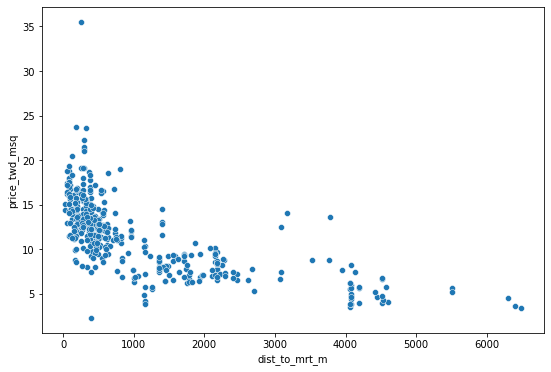

In [9]:
# understanding relation ship between price and dist to mrt
fig,ax=plt.subplots()
sns.scatterplot(x='dist_to_mrt_m',y='price_twd_msq',data=tai)
fig.set_size_inches([9,6])

### Fitting a regression
* Linear Regression defined by 2 parameters, the slope and the intercept
* Slope is constant for a line (change in y)/(change in x)


In [12]:
from statsmodels.formula.api import ols
model=ols('dist_to_mrt_m~price_twd_msq',data=tai)
model1=model.fit()
model1.params

Intercept        3456.999528
price_twd_msq    -206.506091
dtype: float64

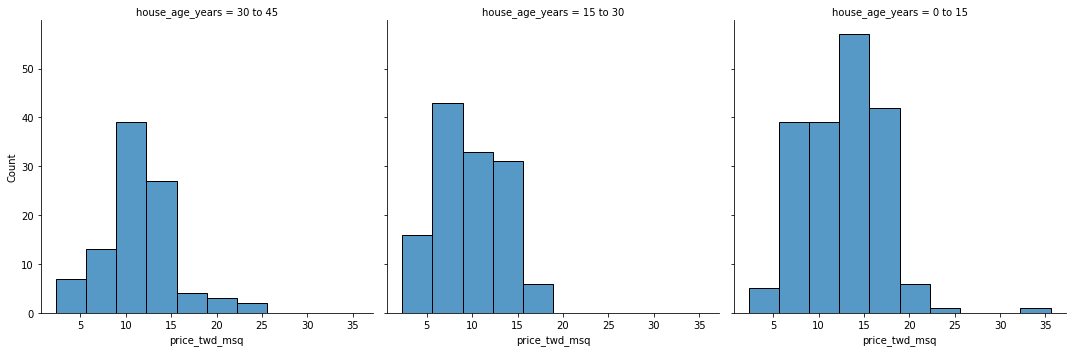

In [13]:
# Visualize the relationship between house age years and price
sns.displot(data=tai,x='price_twd_msq',col='house_age_years',bins=10)

In [14]:
# Fitting a model with categorical variable
model=ols('price_twd_msq~house_age_years+0',data=tai).fit()
model.params

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64

In [17]:
model=ols('price_twd_msq~dist_to_mrt_m',data=tai).fit()
model.params

Intercept        13.873352
dist_to_mrt_m    -0.002197
dtype: float64

In [19]:
tai['predictions']=model.fittedvalues

In [21]:
tai['resid']=model.resid

In [22]:
tai.sample(5)

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq,predictions,resid
127,383.8624,5,0 to 15,16.641452,13.029894,3.611559
283,1978.6710,2,30 to 45,7.110439,9.525633,-2.415194
319,272.6783,5,30 to 45,8.139183,13.274198,-5.135015
4,390.5684,5,0 to 15,13.040847,13.015159,0.025689
118,1583.7220,3,15 to 30,9.258699,10.393451,-1.134752


In [25]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     342.2
Date:                Sat, 10 Dec 2022   Prob (F-statistic):           4.64e-56
Time:                        11:25:40   Log-Likelihood:                -1047.6
No. Observations:                 414   AIC:                             2099.
Df Residuals:                     412   BIC:                             2107.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        13.8734      0.197     70.258

### Regression to the mean
* Response_actual=fitted_value/prediction + residual
* This is equivalent to saying what can be expalained and what cannot be expalined.
* Extreme examples are due to radomness or noise
* Extreme examples do ot persist over time. This is the key intuition behind *Regression to the mean*.
### Transformations
* Sometimes the relationships between the data are not linear. In that case you might need to square or cube the explanatory variable before fitting the data.
* If the data is right skewed, lots of low values with few high outliers a sqrt transformation on both the explanatory and the response varibale could work and is commonly used. In this case prediction requires an extra step of squaring the prediction results


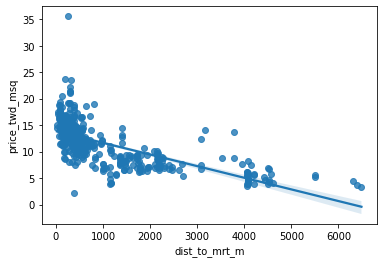

In [26]:
sns.regplot(data=tai,x='dist_to_mrt_m',y='price_twd_msq')

> The dist_to_mrt variable seem to be right skewed with a few outliers, houses that are very far from the MRT station. In this case it might be benefecial to transform the variable with a sqrt transformation

In [29]:
import numpy as np
tai['dist_sq']=np.sqrt(tai.dist_to_mrt_m)

In [31]:
model2=ols('price_twd_msq~dist_sq',data=tai).fit()


In [34]:
tai['predictions_sq']=model2.fittedvalues
tai['resid_sq']=model2.resid

In [35]:
tai.sample(5)

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq,predictions,resid,dist_sq,predictions_sq,resid_sq
53,492.2313,5,0 to 15,11.770045,12.791775,-1.021730,22.186286,12.653195,-0.883150
261,2288.0110,3,15 to 30,7.382753,8.845922,-1.463169,47.833158,7.963848,-0.581094
183,4082.0150,0,15 to 30,5.688351,4.903971,0.784380,63.890649,5.027850,0.660501
54,289.3248,5,15 to 30,15.642965,13.237620,2.405345,17.009550,13.599724,2.043241
133,373.3937,8,15 to 30,11.951589,13.052896,-1.101308,19.323398,13.176654,-1.225065


In [36]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     469.7
Date:                Sat, 10 Dec 2022   Prob (F-statistic):           4.55e-70
Time:                        12:39:44   Log-Likelihood:                -1015.3
No. Observations:                 414   AIC:                             2035.
Df Residuals:                     412   BIC:                             2043.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.7098      0.278     60.163      0.0

> In this case looks like the predictions after taking the sqrt are better, both by looking at the sample and the adjusted R squared in the model summary 0.53 vs 0.45